# Lab 2 Project (Titanic)
Jason Ballard
19 March 2025

Import the external Python libraries used (e.g., pandas, numpy, matplotlib, seaborn, sklearn and more).

In [23]:
# Data Handling & Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Machine Learning & Model Evaluation
from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dimensionality Reduction
from sklearn.decomposition import PCA

In [24]:
# Load the wine dataset
wine_data = load_wine()
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine['class'] = wine_data.target  # Add target variable

## Section 1. Import and Inspect the Data

In [25]:
# Convert to a Pandas DataFrame
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine['target'] = wine_data.target  # Add target column

# Display first few rows
print(wine.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [26]:
wine.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [27]:
print(wine.describe())


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [28]:
print(wine.corr(numeric_only=True))

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target                       -0.328222    0.437776 -0.049643   

                              alcalinit

### Reflection 1:
1) How many data instances are there?
2) How many features are there?
3) What are the names?
4) Are there any missing values?
5) Are there any non-numeric features?

6) Are the data instances sorted on any of the attributes?
7) What are the units of age?
8) What are the minimum, median and max age?
9) What two different features have the highest correlation?

10) Are there any categorical features that might be useful for prediction?

# Section 2. Data Exploration and Preparation

## 2.1 Explore Data Patterns and Distributions

array([[<Axes: xlabel='color_intensity', ylabel='color_intensity'>,
        <Axes: xlabel='alcohol', ylabel='color_intensity'>,
        <Axes: xlabel='malic_acid', ylabel='color_intensity'>],
       [<Axes: xlabel='color_intensity', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='malic_acid', ylabel='alcohol'>],
       [<Axes: xlabel='color_intensity', ylabel='malic_acid'>,
        <Axes: xlabel='alcohol', ylabel='malic_acid'>,
        <Axes: xlabel='malic_acid', ylabel='malic_acid'>]], dtype=object)

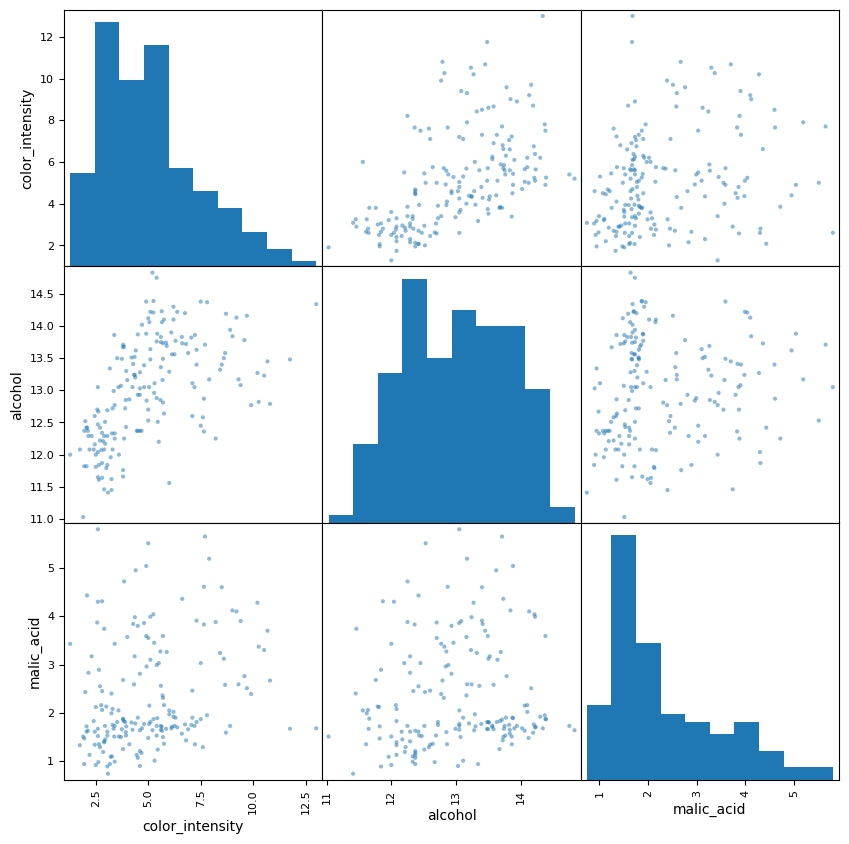

In [29]:
attributes = ['color_intensity', 'alcohol', 'malic_acid']
scatter_matrix(wine[attributes], figsize=(10, 10))

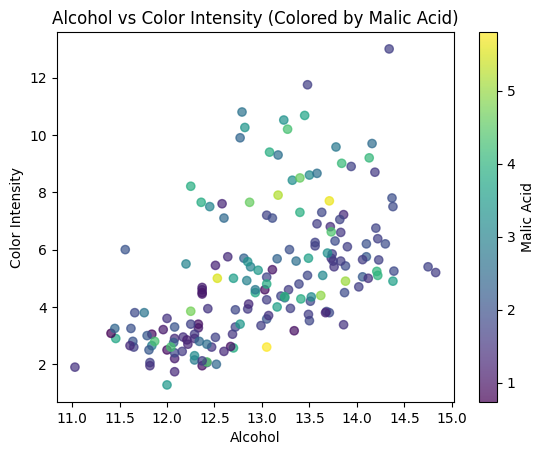

In [30]:
# Scatter plot: Alcohol vs Color Intensity, colored by Malic Acid values
plt.scatter(
    wine['alcohol'], 
    wine['color_intensity'], 
    c=wine['malic_acid'],  # Color by malic acid values
    cmap='viridis',  # Use a color map for better visualization
    alpha=0.7  # Make points slightly transparent
)

# Correct axis labels and title
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Alcohol vs Color Intensity (Colored by Malic Acid)')

# Show the plot
plt.colorbar(label='Malic Acid')  # Add color scale
plt.show()

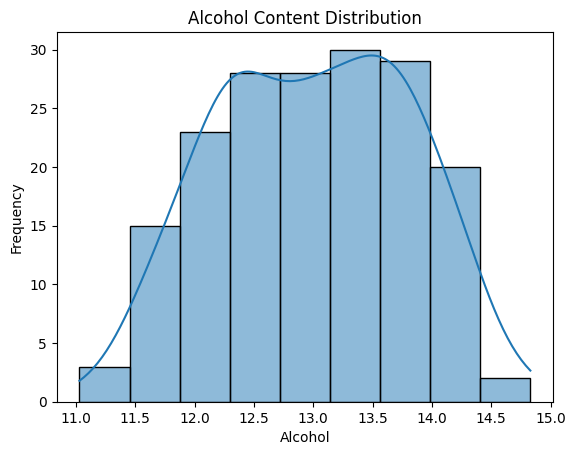

In [31]:
# Create a histogram for Alcohol content
sns.histplot(wine['alcohol'], kde=True)

# Set title and labels
plt.title('Alcohol Content Distribution')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

# Show plot
plt.show()

C:\Users\balla\AppData\Local\Temp\ipykernel_2052\487374935.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=wine, palette='Set2')


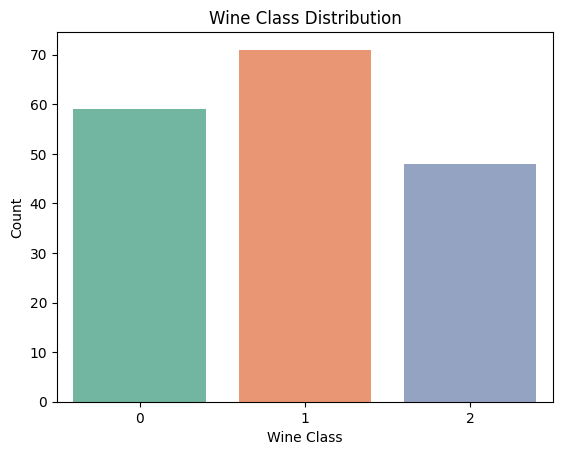

In [32]:
# Add the target column (wine class)
wine['class'] = wine_data.target  # 0, 1, or 2 (wine categories)

# Create a count plot of Wine Class Distribution
sns.countplot(x='class', data=wine, palette='Set2')

# Set title and labels
plt.title('Wine Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Count')

# Show plot
plt.show()

### Reflection 2.1:

1. What patterns or anomalies do you notice?
2. Do any features stand out as potential predictors?
3. Are there any visible class imbalances?

## 2.2 Handle Missing Values and Clean Data

In [33]:
# Check for missing values
print("Missing values before imputation:\n", wine.isnull().sum())

# Fill missing numerical values with the median (if any)
wine.fillna(wine.median(), inplace=True)

# Check for missing values after imputation
print("\nMissing values after imputation:\n", wine.isnull().sum())



Missing values before imputation:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
class                           0
dtype: int64

Missing values after imputation:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0

## 2.3 Feature Engineering

In [34]:
# Create a new feature: Total Phenolic Contribution
wine['phenolic_contribution'] = wine['total_phenols'] + wine['flavanoids']

# Display first few rows to check the new feature
print(wine[['total_phenols', 'flavanoids', 'phenolic_contribution']].head())

   total_phenols  flavanoids  phenolic_contribution
0           2.80        3.06                   5.86
1           2.65        2.76                   5.41
2           2.80        3.24                   6.04
3           3.85        3.49                   7.34
4           2.80        2.69                   5.49


### Reflection 2.3

1. Why might family size be a useful feature for predicting survival?
2. Why convert categorical data to numeric?

# Section 3. Feature Selection and Justification
- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
- Classification: Categorical target variable (e.g., gender, species).
- Justify your selection with reasoning.

## 3.1 Choose features and target

In [35]:
# Add the target (wine class: 0, 1, 2)
wine['class'] = wine_data.target  

# Create a new feature: Total Phenolic Contribution (sum of total_phenols and flavanoids)
wine['phenolic_contribution'] = wine['total_phenols'] + wine['flavanoids']

# Select relevant features for classification
features = ['alcohol', 'malic_acid', 'phenolic_contribution', 'color_intensity']
target = 'class'

# Extract relevant columns
wine_classification = wine[features + [target]]

# Drop rows with missing values (if any)
wine_classification = wine_classification.dropna()

# Display processed dataset
print(wine_classification.head())

   alcohol  malic_acid  phenolic_contribution  color_intensity  class
0    14.23        1.71                   5.86             5.64      0
1    13.20        1.78                   5.41             4.38      0
2    13.16        2.36                   6.04             5.68      0
3    14.37        1.95                   7.34             7.80      0
4    13.24        2.59                   5.49             4.32      0


## 3.2 Define X and y

In [36]:
# Define features (X) and target (y)
X = wine[['alcohol', 'malic_acid', 'color_intensity', 'total_phenols', 'flavanoids']]
y = wine['class']

### Reflection 3:

1. Why are these features selected?
2. Are there any features that are likely to be highly predictive of survival?

# Section 4. Splitting

## 4.1 Basic Train/Test split 

In [37]:
# Assign input features to X
X = wine[['alcohol', 'malic_acid', 'color_intensity', 'total_phenols', 'flavanoids']]

# Assign target variable to y
y = wine['class']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Print dataset sizes
print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 142
Test size: 36


## 4.2 Stratified Train/Test split

In [38]:
# Use StratifiedShuffleSplit to ensure balanced class distribution
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

## 4.3 Compare Results


In [39]:
# Compare class distributions before and after splitting
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("Test Set Class Distribution:\n", y_test.value_counts(normalize=True))

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Original Class Distribution:
 class
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64
Train Set Class Distribution:
 class
1    0.401408
0    0.330986
2    0.267606
Name: proportion, dtype: float64
Test Set Class Distribution:
 class
1    0.388889
0    0.333333
2    0.277778
Name: proportion, dtype: float64
Random Forest Accuracy: 0.9722

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



### Reflection 4:

1. Why might stratification improve model performance?
    Stratification ensures that the class proportions in the training and test sets closely match the original dataset distribution. This is especially important for imbalanced datasets, where one class might be underrepresented. Without stratification, the model might learn biased patterns and perform poorly on minority classes.
2. How close are the training and test distributions to the original dataset?
    Stratified sampling helps maintain similar distributions between the training and test sets. The closer these distributions are to the original dataset, the more representative the model's evaluation will be.
3. Which split method produced better class balance?
    Stratified Shuffle Split is generally better for class balance, ensuring the model sees all classes proportionally during training and evaluation.


In [40]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=123)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy: 0.9573891625615764


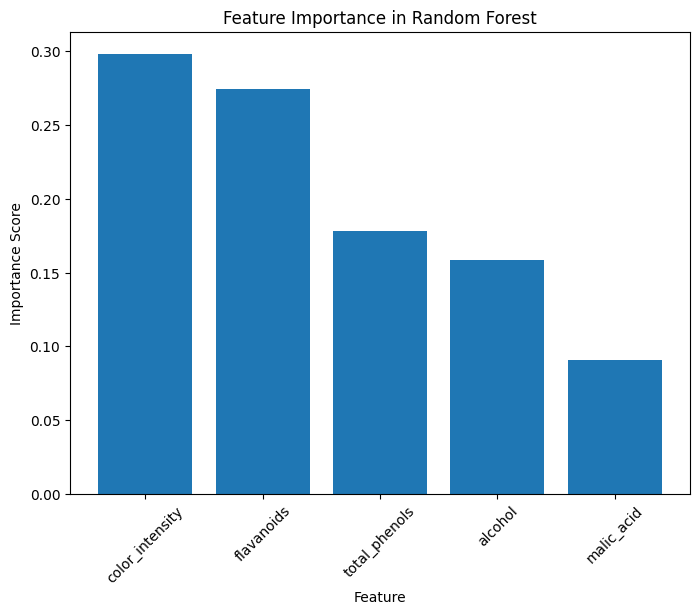

In [41]:
# Train the best Random Forest model from Grid Search
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Sort feature importance values
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

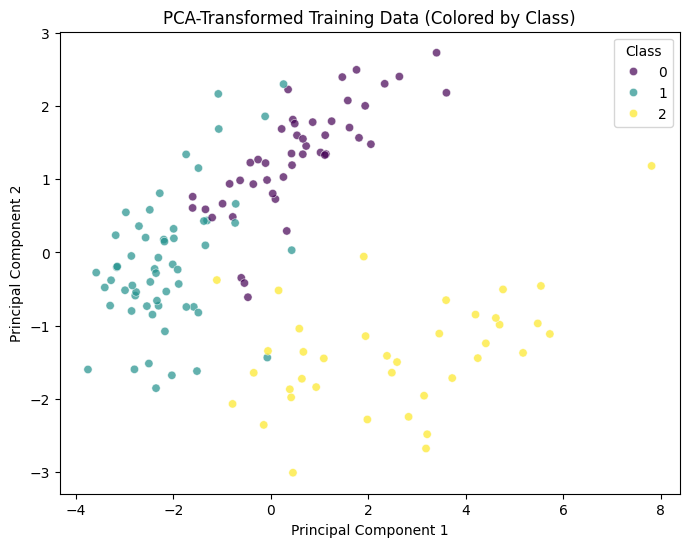

In [42]:
# Reduce features to 2 principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Random Forest model on the transformed data
rf_pca = RandomForestClassifier(n_estimators=100, random_state=123)
rf_pca.fit(X_train_pca, y_train)

# Create scatter plot of PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', alpha=0.7)
plt.title("PCA-Transformed Training Data (Colored by Class)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.show()